In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
stroke_data = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [ ]:
import pandas as pd

unique_values = stroke_data['work_type'].unique()
print(unique_values)


['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']


In [ ]:
import pandas as pd

unique_values = stroke_data['Residence_type'].unique()
print(unique_values)

['Urban' 'Rural']


In [ ]:
import pandas as pd

unique_values = stroke_data['smoking_status'].unique()
print(unique_values)

['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [ ]:
# printing the first 5 rows of the dataset
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# number of rows and columns in the dataset
stroke_data.shape

(5110, 12)

In [ ]:
# getting some info about the data
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Handling missing values by imputation

<ipython-input-9-15276e145cae>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(stroke_data.bmi)


<Axes: xlabel='bmi', ylabel='Density'>

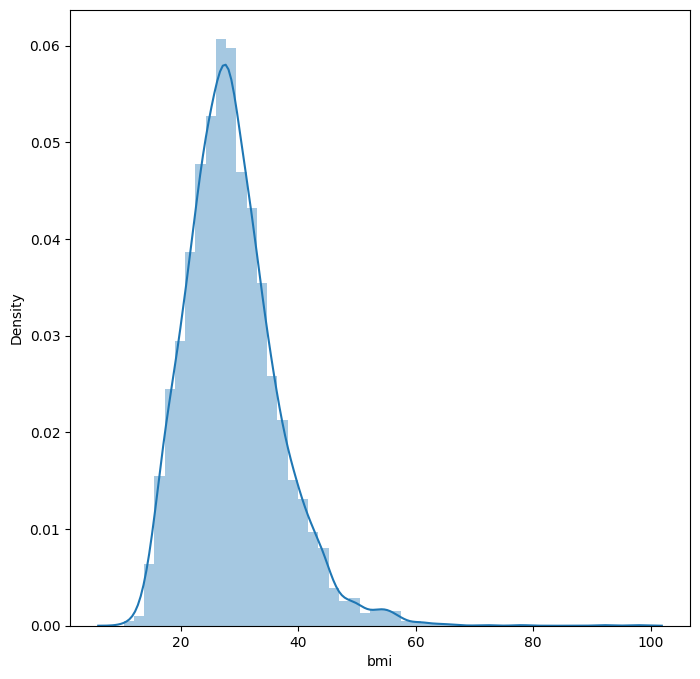

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.distplot(stroke_data.bmi)

Replacing the null values with the median counts.

In [ ]:
stroke_data['bmi'].fillna(stroke_data['bmi'].median(),inplace=True)

In [ ]:
stroke_data.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


No missing values found anymore


In [ ]:
stroke_data[stroke_data.duplicated()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [ ]:
metrics = stroke_data.describe().loc[['count', 'mean', 'std', 'min', 'max']]
print(metrics)


                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  5110.000000  5110.000000  
mean          106.147677    28.862035     0.048728  
std            45.283560     7.699562     0.215320  
min            55.120000    10.300000     0.000000  
max           271.740000    97.600000     1.000000  


Assessing the distribution of the target column

<ipython-input-14-9632f71f6130>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='stroke', data=stroke_data, palette=colors, edgecolor='black')
<ipython-input-14-9632f71f6130>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No Stroke', 'Stroke'])


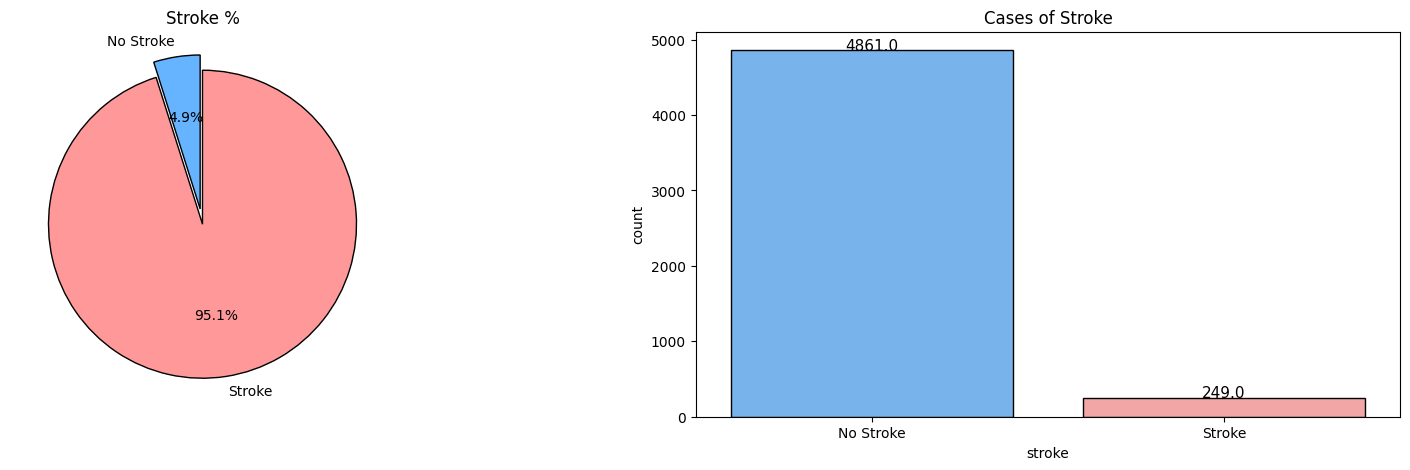

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


l = list(stroke_data['stroke'].value_counts())
circle = [l[1] / sum(l) * 100, l[0] / sum(l) * 100]


colors = ['#66b3ff', '#ff9999']


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Pie chart
plt.subplot(1, 2, 1)
plt.pie(circle, labels=['No Stroke', 'Stroke'], autopct='%1.1f%%', startangle=90, explode=(0.1, 0), colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('Stroke %')

# Bar chart
plt.subplot(1, 2, 2)
ax = sns.countplot(x='stroke', data=stroke_data, palette=colors, edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(),
            horizontalalignment='center', fontsize=11)
ax.set_xticklabels(['No Stroke', 'Stroke'])
plt.title('Cases of Stroke')


plt.show()


In [ ]:
# checking the distribution of Target Variable
stroke_data['stroke'].value_counts()

,count
stroke,
0,4861
1,249


In [ ]:
cc = stroke_data.select_dtypes(exclude=np.number).columns
cc

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

Encoding the categorical variables

In [ ]:
stroke_data_encoded = pd.get_dummies(stroke_data, columns=cc, drop_first=True)


In [ ]:
stroke_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5110 non-null   int64  
 1   age                             5110 non-null   float64
 2   hypertension                    5110 non-null   int64  
 3   heart_disease                   5110 non-null   int64  
 4   avg_glucose_level               5110 non-null   float64
 5   bmi                             5110 non-null   float64
 6   stroke                          5110 non-null   int64  
 7   gender_Male                     5110 non-null   bool   
 8   gender_Other                    5110 non-null   bool   
 9   ever_married_Yes                5110 non-null   bool   
 10  work_type_Never_worked          5110 non-null   bool   
 11  work_type_Private               5110 non-null   bool   
 12  work_type_Self-employed         51

Confirming changes after encoding the data

In [ ]:
stroke_data_encoded.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,True,False,True,False,True,False,False,True,True,False,False
1,51676,61.0,0,0,202.21,28.1,1,False,False,True,False,False,True,False,False,False,True,False
2,31112,80.0,0,1,105.92,32.5,1,True,False,True,False,True,False,False,False,False,True,False
3,60182,49.0,0,0,171.23,34.4,1,False,False,True,False,True,False,False,True,False,False,True
4,1665,79.0,1,0,174.12,24.0,1,False,False,True,False,False,True,False,False,False,True,False


Visualizing the features

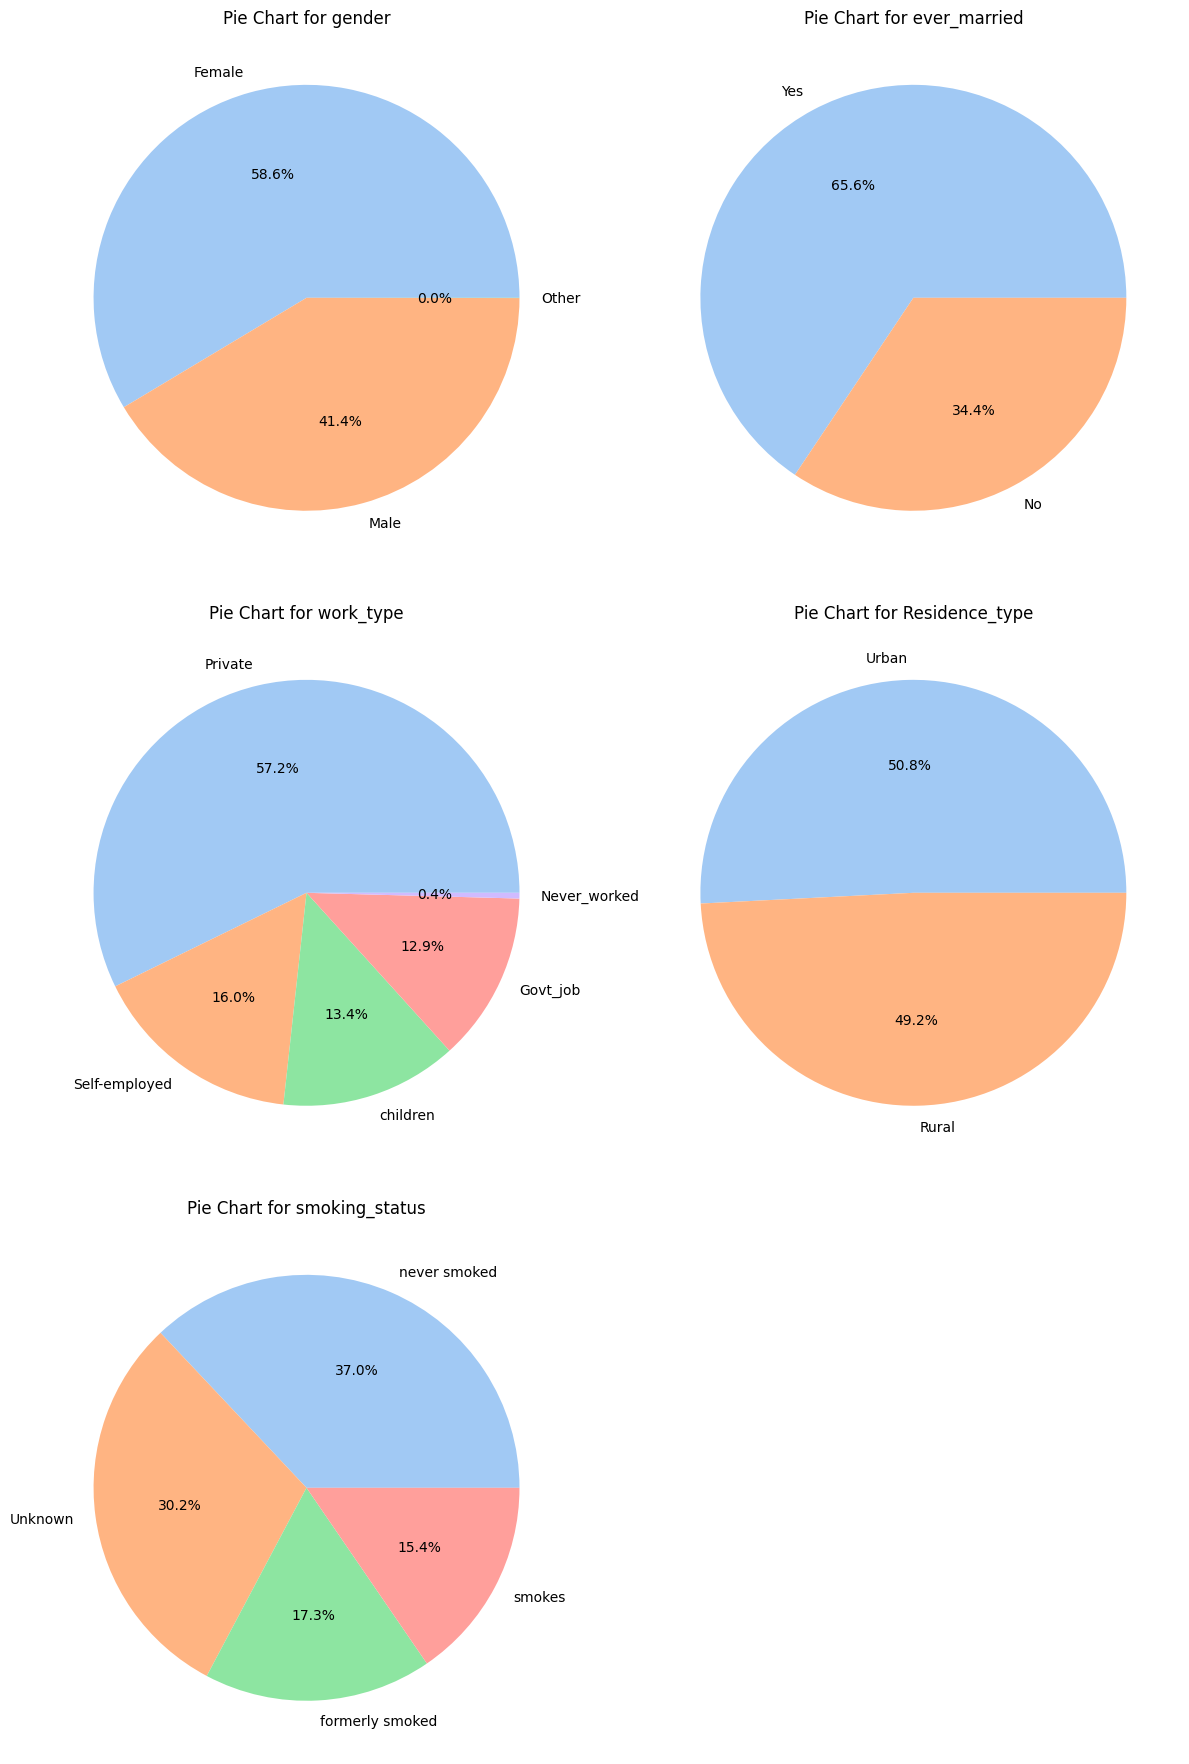

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


def visualize_categorical_with_pie(df, categorical_columns):
    num_cols = 2
    num_plots = len(categorical_columns)


    num_rows = (num_plots + num_cols - 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))

    axes = axes.flatten()

    for i, col in enumerate(categorical_columns):
        df[col].value_counts().plot(kind='pie', ax=axes[i], autopct='%1.1f%%', colors=sns.color_palette('pastel'))
        axes[i].set_title(f'Pie Chart for {col}')
        axes[i].set_ylabel('')

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

visualize_categorical_with_pie(stroke_data, cc)


In [ ]:
nc = stroke_data.select_dtypes(include=np.number).columns
nc

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')

Data partitioning

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting features and target
X = stroke_data_encoded.drop('stroke', axis=1)
y = stroke_data_encoded['stroke']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



Balancing the data using Over Sampling (SMOTE)

In [ ]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print(f"Original dataset shape: {y_train.value_counts()}")
print(f"Resampled dataset shape: {y_train_res.value_counts()}")


Original dataset shape: stroke
0    3417
1     160
Name: count, dtype: int64
Resampled dataset shape: stroke
0    3417
1    3417
Name: count, dtype: int64


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score


rf_model = RandomForestClassifier(random_state=42)


rf_model.fit(X_train_res, y_train_res)


y_pred = rf_model.predict(X_test)


print(classification_report(y_test, y_pred))


y_prob = rf_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc}")


              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1444
           1       0.16      0.12      0.14        89

    accuracy                           0.91      1533
   macro avg       0.55      0.54      0.55      1533
weighted avg       0.90      0.91      0.91      1533

ROC-AUC Score: 0.7694372685113138


Verification of handling imbalance in data using SMOTE

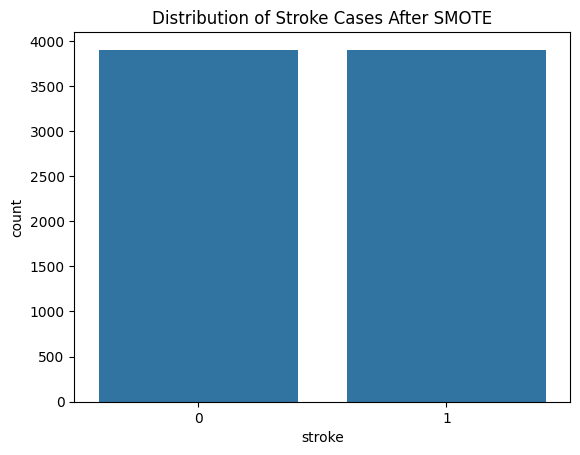

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


X = stroke_data_encoded.drop('stroke', axis=1)
y = stroke_data_encoded['stroke']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


sns.countplot(x=y_train_smote)
plt.title('Distribution of Stroke Cases After SMOTE')
plt.show()


<ipython-input-26-aef16fcb3517>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=y_train_smote, palette=colors, edgecolor='black')
<ipython-input-26-aef16fcb3517>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No Stroke', 'Stroke'])


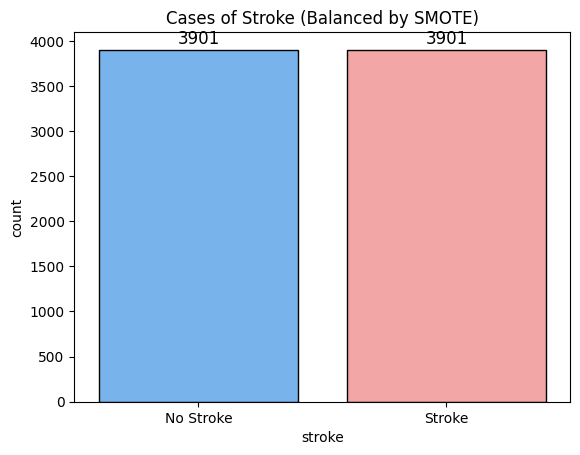

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Data partitioning
X = stroke_data_encoded.drop('stroke', axis=1)
y = stroke_data_encoded['stroke']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


ax = sns.countplot(x=y_train_smote, palette=colors, edgecolor='black')

# Add counts on top of the bars
for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 20, int(height),
            ha='center', va='bottom', fontsize=12)

ax.set_xticklabels(['No Stroke', 'Stroke'])
plt.title('Cases of Stroke (Balanced by SMOTE)')
plt.show()

In [ ]:
print("Shape of X_train after SMOTE:", X_train_smote.shape)
print("Shape of y_train after SMOTE:", y_train_smote.shape)


Shape of X_train after SMOTE: (7802, 17)
Shape of y_train after SMOTE: (7802,)


In [ ]:
stroke_data_encoded.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,True,False,True,False,True,False,False,True,True,False,False
1,51676,61.0,0,0,202.21,28.1,1,False,False,True,False,False,True,False,False,False,True,False
2,31112,80.0,0,1,105.92,32.5,1,True,False,True,False,True,False,False,False,False,True,False
3,60182,49.0,0,0,171.23,34.4,1,False,False,True,False,True,False,False,True,False,False,True
4,1665,79.0,1,0,174.12,24.0,1,False,False,True,False,False,True,False,False,False,True,False


In [ ]:
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression()
lreg.fit(X_train_smote,y_train_smote)
y_pred = lreg.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score , confusion_matrix , classification_report


In [ ]:
accuracy_score(y_test,y_pred)

0.7025440313111546

In [ ]:
precision_score(y_test,y_pred)

0.14201183431952663

In [ ]:
recall_score(y_test,y_pred)

0.7741935483870968

In [ ]:
c_matrix = confusion_matrix(y_test,y_pred)
c_matrix

array([[670, 290],
       [ 14,  48]])

<Axes: >

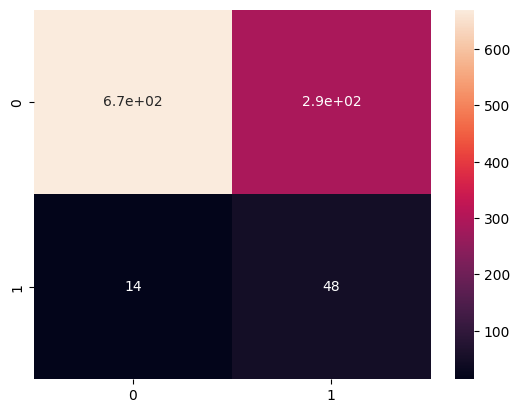

In [ ]:
sns.heatmap(c_matrix , annot = True)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.70      0.82       960
           1       0.14      0.77      0.24        62

    accuracy                           0.70      1022
   macro avg       0.56      0.74      0.53      1022
weighted avg       0.93      0.70      0.78      1022



Balancing the data using Under Sampling

In [ ]:
yesStroke = stroke_data_encoded[stroke_data_encoded['stroke']==1]
noStroke = stroke_data_encoded[stroke_data_encoded['stroke']==0]
print('No Stroke : ', noStroke.shape ,'No Stroke : ', yesStroke.shape)

No Stroke :  (4861, 18) No Stroke :  (249, 18)


In [ ]:
noStroke_new = noStroke.sample(280)
print('No Stroke(New) : ', noStroke_new.shape)

No Stroke(New) :  (280, 18)


In [ ]:
final_data = pd.concat([yesStroke , noStroke_new], axis = 0)
print('Shape of the final data : ', final_data.shape)

Shape of the final data :  (529, 18)


In [ ]:
final_data.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,True,False,True,False,True,False,False,True,True,False,False
1,51676,61.0,0,0,202.21,28.1,1,False,False,True,False,False,True,False,False,False,True,False
2,31112,80.0,0,1,105.92,32.5,1,True,False,True,False,True,False,False,False,False,True,False
3,60182,49.0,0,0,171.23,34.4,1,False,False,True,False,True,False,False,True,False,False,True
4,1665,79.0,1,0,174.12,24.0,1,False,False,True,False,False,True,False,False,False,True,False


In [ ]:
from sklearn.model_selection import train_test_split

# Data partitioning
X = final_data.drop('stroke', axis=1)
y = final_data['stroke']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

<ipython-input-42-fa33a4a54803>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=y_train, palette=colors, edgecolor='black')
<ipython-input-42-fa33a4a54803>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No Stroke', 'Stroke'])


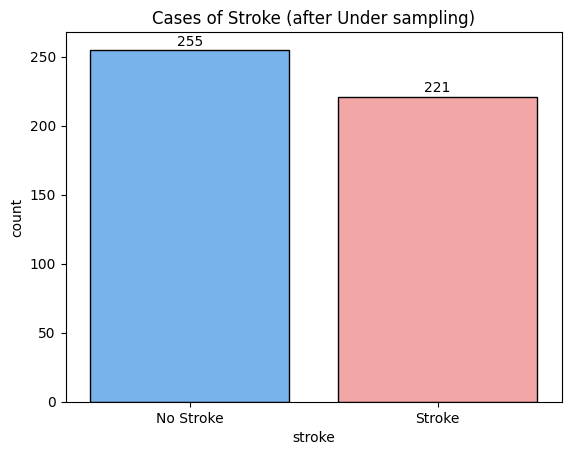

In [ ]:

ax = sns.countplot(x=y_train, palette=colors, edgecolor='black')


for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 1, int(height),
            ha='center', va='bottom', fontsize=10)

ax.set_xticklabels(['No Stroke', 'Stroke'])
plt.title('Cases of Stroke (after Under sampling)')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression()
lreg.fit(X_train,y_train)
y_pred = lreg.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score , confusion_matrix , classification_report


In [ ]:
accuracy_score(y_test,y_pred)

0.6226415094339622

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.56      0.58        25
           1       0.63      0.68      0.66        28

    accuracy                           0.62        53
   macro avg       0.62      0.62      0.62        53
weighted avg       0.62      0.62      0.62        53



In [ ]:
#Importing the necessary libraries for various models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [ ]:
l_reg = LogisticRegression()
r_forest = RandomForestClassifier()
d_tree = DecisionTreeClassifier()
SVC = SVC()
KNN = KNeighborsClassifier()
nb = GaussianNB()

models = [l_reg,r_forest,d_tree,SVC,KNN,nb]
model = []
accuracy = []
for i in models:
  i.fit(X_test,y_test)
  yp = i.predict(X_test)
  acc = accuracy_score(y_test,yp)
  accuracy.append(acc)
  model.append(i.__class__.__name__)

In [ ]:
model_data = pd.DataFrame({'Model' : model , 'Accuracy' : accuracy})
model_data

,Model,Accuracy
0,LogisticRegression,0.622642
1,RandomForestClassifier,1.000000
2,DecisionTreeClassifier,1.000000
3,SVC,0.622642
4,KNeighborsClassifier,0.735849
5,GaussianNB,0.716981


Applying cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
modelss = [l_reg,r_forest,d_tree,SVC,KNN,nb]
features = X
labels = y

CV = 4
a_list = []
m_list = []
for i in modelss:
  model_name = i.__class__.__name__
  ac = cross_val_score(i,features,labels,scoring='accuracy',cv=CV)
  a_list.append(ac.mean())
  m_list.append(model_name)

In [ ]:
m_df = pd.DataFrame({'Model ': m_list, 'Accuracy' : a_list})
m_df

,Model,Accuracy
0,LogisticRegression,0.720238
1,RandomForestClassifier,0.744745
2,DecisionTreeClassifier,0.654121
3,SVC,0.548246
4,KNeighborsClassifier,0.516106
5,GaussianNB,0.744845


Fine tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score


param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10]
}

# Creating the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)


grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy')


grid_search_rf.fit(X_train, y_train)

# Geting the best parameters
best_params_rf = grid_search_rf.best_params_
print("Best Parameters for Random Forest:", best_params_rf)


Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:
rf_best = RandomForestClassifier(**best_params_rf, random_state=42)
rf_best.fit(X_train, y_train)


y_pred_rf = rf_best.predict(X_test)

# Performing cross-validation for Random Forest
ac_cv_rf = cross_val_score(rf_best, features, labels, scoring='accuracy', cv=CV)

# Accuracy scores for each scores
print("Cross-validation accuracy scores for Random Forest:", ac_cv_rf)


Cross-validation accuracy scores for Random Forest: [0.7593985  0.72727273 0.78030303 0.74242424]


In [ ]:
mean_accuracy_rf = ac_cv_rf.mean()
print(f"Mean cross-validation accuracy for Random Forest: {mean_accuracy_rf:.4f}")

Mean cross-validation accuracy for Random Forest: 0.7523


In [ ]:
final_data.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,True,False,True,False,True,False,False,True,True,False,False
1,51676,61.0,0,0,202.21,28.1,1,False,False,True,False,False,True,False,False,False,True,False
2,31112,80.0,0,1,105.92,32.5,1,True,False,True,False,True,False,False,False,False,True,False
3,60182,49.0,0,0,171.23,34.4,1,False,False,True,False,True,False,False,True,False,False,True
4,1665,79.0,1,0,174.12,24.0,1,False,False,True,False,False,True,False,False,False,True,False


In [ ]:
print ("Collecting data from patient ")
id = int(input("Enter your ID: "))
age = int(input("Enter your age: "))
hypertension = int(input("Enter hypertension: "))
heart_disease = int(input("Enter 1 if you have heart disease, 0 otherwise: "))
avg_glucose_level = float(input("Enter average glucose level: "))
bmi = float(input("Enter your BMI: "))
gender = int(input("Enter your gender(0: Female , 1: Male , 2: Other): "))
gender_Male = gender_Other = False
if gender == 1:
    gender_Male = True
elif gender == 2:
    gender_Other = True
ever_married = int(input("Enter 1 if you have ever married, 0 otherwise: "))
work_type = int(input("Enter your work type (0: Never Worked, 1: Private, 2: Self Employed, 3: Children): "))
work_type_Never_worked = work_type_Private = work_type_Self_employed = work_type_children = False
if work_type == 0:
    work_type_Never_worked = True
elif work_type == 1:
    work_type_Private = True
elif work_type == 2:
    work_type_Self_employed = True
elif work_type == 3:
    work_type_children = True
residence_type = int(input("Enter 1 if your residence type is urban, 0 otherwise: "))
smoking_status = int(input("Enter your smoking status (0: Never Smoked, 1: Formerly Smoked, 2: Smokes): "))
smoking_status_Never_Smoked = smoking_status_Formerly_Smoked = smoking_status_Smokes = False
if smoking_status == 0:
    smoking_status_Never_Smoked = True
elif smoking_status == 1:
    smoking_status_Formerly_Smoked = True
elif smoking_status == 2:
    smoking_status_Smokes = True

Enter your ID: 12334
Enter your age: 12
Enter hypertension: 0
Enter 1 if you have heart disease, 0 otherwise: 1
Enter average glucose level: 120
Enter your BMI: 21
Enter your gender(0: Female , 1: Male , 2: Other): 0
Enter 1 if you have ever married, 0 otherwise: 0
Enter your work type (0: Never Worked, 1: Private, 2: Self Employed, 3: Children): 1
Enter 1 if your residence type is urban, 0 otherwise: 0
Enter your smoking status (0: Never Smoked, 1: Formerly Smoked, 2: Smokes): 2


In [ ]:
Collected_data = [id, age, hypertension, heart_disease, avg_glucose_level, bmi, gender_Male, gender_Other, ever_married, work_type_children, work_type_Never_worked, work_type_Private, work_type_Self_employed, residence_type, smoking_status_Formerly_Smoked, smoking_status_Never_Smoked, smoking_status_Smokes]
prob = rf_best.predict_proba([Collected_data])
h_probab = prob[0][1] * 100

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
print(f'Probability of a heart stroke in future for you: {h_probab:.2f}%')

Probability of a heart stroke in future for you: 25.30%


Evaluating the performance of the model

In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score


precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Precision: 0.71
Recall: 0.86
F1 Score: 0.77


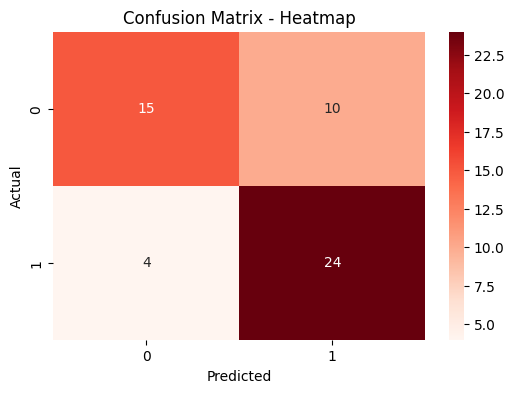

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Reds', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Heatmap')
plt.show()


In [ ]:
from sklearn.metrics import classification_report


report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.79      0.60      0.68        25
           1       0.71      0.86      0.77        28

    accuracy                           0.74        53
   macro avg       0.75      0.73      0.73        53
weighted avg       0.75      0.74      0.73        53



In [ ]:
from sklearn.model_selection import cross_val_score


ac_cv = cross_val_score(rf_best, features, labels, scoring='accuracy', cv=CV)


print("Cross-Validation Accuracy Scores:", ac_cv)


print(f"Mean Accuracy: {ac_cv.mean():.2f}")
print(f"Standard Deviation of Accuracy: {ac_cv.std():.2f}")


Cross-Validation Accuracy Scores: [0.7593985  0.72727273 0.78030303 0.74242424]
Mean Accuracy: 0.75
Standard Deviation of Accuracy: 0.02


Making the model available for deployment

In [ ]:
import pickle
model_file = 'stroke_model.sav'
pickle.dump(rf_best, open(model_file,'wb'))


In [ ]:
l_model = pickle.load(open('stroke_model.sav','rb'))

In [ ]:
print ("Collecting data from patient ")
id = int(input("Enter your ID: "))
age = int(input("Enter your age: "))
hypertension = int(input("Enter hypertension: "))
heart_disease = int(input("Enter 1 if you have heart disease, 0 otherwise: "))
avg_glucose_level = float(input("Enter average glucose level: "))
bmi = float(input("Enter your BMI: "))
gender = int(input("Enter your gender(0: Female , 1: Male , 2: Other): "))
gender_Male = gender_Other = False
if gender == 1:
    gender_Male = True
elif gender == 2:
    gender_Other = True
ever_married = int(input("Enter 1 if you have ever married, 0 otherwise: "))
work_type = int(input("Enter your work type (0: Never Worked, 1: Private, 2: Self Employed, 3: Children): "))
work_type_Never_worked = work_type_Private = work_type_Self_employed = work_type_children = False
if work_type == 0:
    work_type_Never_worked = True
elif work_type == 1:
    work_type_Private = True
elif work_type == 2:
    work_type_Self_employed = True
elif work_type == 3:
    work_type_children = True
residence_type = int(input("Enter 1 if your residence type is urban, 0 otherwise: "))
smoking_status = int(input("Enter your smoking status (0: Never Smoked, 1: Formerly Smoked, 2: Smokes): "))
smoking_status_Never_Smoked = smoking_status_Formerly_Smoked = smoking_status_Smokes = False
if smoking_status == 0:
    smoking_status_Never_Smoked = True
elif smoking_status == 1:
    smoking_status_Formerly_Smoked = True
elif smoking_status == 2:
    smoking_status_Smokes = True

Collected_data = [id, age, hypertension, heart_disease, avg_glucose_level, bmi, gender_Male, gender_Other, ever_married, work_type_children, work_type_Never_worked, work_type_Private, work_type_Self_employed, residence_type, smoking_status_Formerly_Smoked, smoking_status_Never_Smoked, smoking_status_Smokes]
prob = l_model.predict_proba([Collected_data])
h_probab = prob[0][1] * 100

print(f'Probability of a heart stroke in future for you: {h_probab:.2f}%')

Enter your ID: 12334
Enter your age: 12
Enter hypertension: 0
Enter 1 if you have heart disease, 0 otherwise: 1
Enter average glucose level: 120
Enter your BMI: 21
Enter your gender(0: Female , 1: Male , 2: Other): 0
Enter 1 if you have ever married, 0 otherwise: 0
Enter your work type (0: Never Worked, 1: Private, 2: Self Employed, 3: Children): 1
Enter 1 if your residence type is urban, 0 otherwise: 0
Enter your smoking status (0: Never Smoked, 1: Formerly Smoked, 2: Smokes): 2
Probability of a heart stroke in future for you: 25.30%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
